In [6]:
 # Load & Inspect the Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("Social_Network_Ads.csv")

# View top records
print(df.head())
print(df.info())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [7]:
# Data Preprocessing
# A. Check for Nulls

print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [8]:
# Drop rows with missing values (if any)
df_before = df.copy()
df = df.dropna()

# Compare the shape of the DataFrame before and after dropping rows
print(f"Before dropping rows: {df_before.shape}")
print(f"After dropping rows: {df.shape}")


Before dropping rows: (400, 5)
After dropping rows: (400, 5)


In [9]:
# Check Descriptive Stats

print(df.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


In [10]:
# Check Data Types

print(df.dtypes)

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


In [11]:
# Outlier Detection (IQR method)

numeric_cols = ['Age', 'EstimatedSalary']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"\nOutliers in {col}:\n", outliers[[col]])

    # The result you see means that there were no values in the "Age" and "EstimatedSalary" columns that lie outside the calculated bounds for outliers.

# Therefore, the "Empty DataFrame" shows that no rows meet the outlier condition.


Outliers in Age:
 Empty DataFrame
Columns: [Age]
Index: []

Outliers in EstimatedSalary:
 Empty DataFrame
Columns: [EstimatedSalary]
Index: []


In [12]:
# Step 3: Data Scaling (Normalization)

X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']  # Target column

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame for easier inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=['Age', 'EstimatedSalary'])

# Display the first few rows of the scaled data
print(X_scaled_df.head())

# or example, the first value in the Age column is -1.781797, which means that the age for this entry is 1.78 standard deviations below the mean.

# Similarly, the first value in EstimatedSalary is -1.490046, which means that the salary for this entry is 1.49 standard deviations below the mean.


        Age  EstimatedSalary
0 -1.781797        -1.490046
1 -0.253587        -1.460681
2 -1.113206        -0.785290
3 -1.017692        -0.374182
4 -1.781797         0.183751


In [13]:
# Step 4: Logistic Regression Model

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [14]:
 # Confusion Matrix and Metrics

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# TP, FP, TN, FN
TN, FP, FN, TP = cm.ravel()

# Metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
error_rate = 1 - accuracy
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f"\nTP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
 [[71  2]
 [16 31]]

TP: 31, FP: 2, TN: 71, FN: 16
Accuracy: 0.85
Error Rate: 0.15
Precision: 0.94
Recall: 0.66


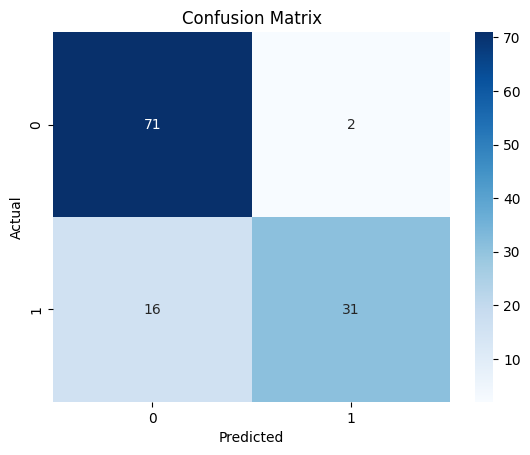

In [15]:
 # Visualize Confusion Matrix

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
